### Softmax Classifier for CIFAT-10

#### Load_Dataset : Constomize CIFAR-10 Image Data 

In [146]:
import numpy as np
import tensorflow as tf
import time
import Load_Dataset
from PIL import Image

#### load Dataset from Load_Dataset.py

In [147]:
data_set = Load_Dataset.load_data()
data_reshape = Load_Dataset.reshape_data(data_set)

train_X = data_reshape['images_train']
train_Y = data_reshape['labels_train']
test_X = data_reshape['images_test']
test_Y = data_reshape['labels_test']
classes = data_set['classes']

train_X[0].dtype

dtype('float64')

In [97]:
X = tf.placeholder(shape=[None, 32, 32, 3], dtype=tf.float32, name='X')
Y = tf.placeholder(shape=[None], dtype=tf.uint8, name='Y')
W = tf.Variable(tf.zeros([3072, 10]), name='W')
B = tf.Variable(tf.zeros([10]), name='B')

In [98]:
def layer(input, weight_shape, name):
    with tf.name_scope(name):
        W = tf.Variable(tf.truncated_normal(shape=weight_shape, mean=0.0, stddev=0.02, name='layer_W'))
        L = tf.nn.conv2d(input, W, strides=[1,1,1,1], padding='SAME', name='conv')
        relu = tf.nn.relu(L, name='relu')
        output = tf.nn.max_pool(L, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name='pooling')
        return W, output

In [104]:
def fully_connect(input, weight_shape, bias_shape, name):
    with tf.name_scope(name):
        W = tf.get_variable('lay_W', shape=weight_shape, initializer=tf.contrib.layers.xavier_initializer())
        B = tf.Variable(tf.zeros(bias_shape), name='ful_B')
        H = tf.matmul(input, W, name='ful_H') + B
        softmax = tf.nn.softmax(H, name='softmaxw')
        return H, softmax

In [105]:
## Layer 1 => 0-W, 1-B, 2-W, 3-output
layer_1 = layer(X, [2, 2, 3, 32], 'first')[1]

layer_2 = layer(layer_1, [2, 2, 32, 64], 'second')[1]

# reshape Last output to vector
vec_layer = tf.reshape(layer_2, [-1, 8*8*64])

In [106]:
## fully connect => 0-output, 1-sofrmax
ful_output, softmax = fully_connect(vec_layer, [8*8*64, 10], [10], 'last')

In [107]:
## one_hot label
Y_one = tf.one_hot(Y, 10, axis=1)

In [108]:
## minimize
entropy = tf.nn.softmax_cross_entropy_with_logits(labels=Y_one, logits=ful_output, name='loss')
loss = tf.reduce_mean(entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train_op = optimizer.minimize(loss)

In [109]:
# Accuracy
Accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(softmax, 1), tf.argmax(Y_one, 1)), dtype=tf.float32))

In [47]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    epoch = 50
    batch_size = 5000
    batch_count = 50000 // batch_size
    for i in range(epoch):
        print("epoch :", i)
        loss_total=0
        for i in range(batch_count):
            batch_index = i*batch_size
            img = train_X[batch_index:batch_index+batch_size]
            label = train_Y[batch_index:batch_index+batch_size]
            _,loss_val = sess.run([train_op, loss],feed_dict={X:img, Y:label})
            loss_total += loss_val
        print("loss ==> ", loss_total)

    test_img = test_X[:]
    test_label = test_Y[:]
    acc, pre = sess.run([Accuracy, Y_one], feed_dict={X:test_img, Y:test_label})
    print("Accuracy : ", acc) 


epoch : 0
loss ==>  20.1502830982
epoch : 1
loss ==>  16.7771908045
epoch : 2
loss ==>  15.3729429245
epoch : 3
loss ==>  14.2782267332
epoch : 4
loss ==>  13.3750494719
epoch : 5
loss ==>  12.6900279522
epoch : 6
loss ==>  12.1930938959
epoch : 7
loss ==>  11.791190505
epoch : 8
loss ==>  11.4442846775
epoch : 9
loss ==>  11.1600424051
epoch : 10
loss ==>  10.9255077839
epoch : 11
loss ==>  10.5946134329
epoch : 12
loss ==>  10.3736513853
epoch : 13
loss ==>  10.1937305331
epoch : 14
loss ==>  10.0404818654
epoch : 15
loss ==>  9.85088115931
epoch : 16
loss ==>  9.61280101538
epoch : 17
loss ==>  9.41454613209
epoch : 18
loss ==>  9.27944689989
epoch : 19
loss ==>  9.13621819019
epoch : 20
loss ==>  9.0127120018
epoch : 21
loss ==>  8.9101575613
epoch : 22
loss ==>  8.80753898621
epoch : 23
loss ==>  8.6791677475
epoch : 24
loss ==>  8.5543435216
epoch : 25
loss ==>  8.45723599195
epoch : 26
loss ==>  8.35358959436
epoch : 27
loss ==>  8.26973432302
epoch : 28
loss ==>  8.17704874277


In [48]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10):
        num = np.random.uniform(0, 10000, 10).astype(int)
        test_img = test_X[num[i]]
        test_label = test_Y[num[i]]
        acc, pre = sess.run([Accuracy, Y_one], feed_dict={X:test_img, Y:test_label})
        print(Image.fromarray(test_img))
        print("------%s------" % classes[np.argmax(pre)])

ValueError: Cannot feed value of shape (32, 32, 3) for Tensor 'X:0', which has shape '(?, 32, 32, 3)'

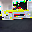

In [128]:
num = np.random.uniform(0, 10000, 1).astype(int)
test_img = test_X[num[0]]
# Image.fromarray(test_img)
Image.fromarray(train_X[10000].astype(np.uint8))